# ML

In [1]:
from functions.others import * 
import pandas as pd
import numpy as np


In [121]:
df_train = load_obj('training/pro_train.pkl')
df_test = load_obj('training/pro_test.pkl')
df_train.describe()

,svolume,nhits,nclusters,nhitspercluster,xmax,ymax,zmax,xmin,ymin,zmin,zmean,xvar,yvar,zvar,target,event_id
count,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,475746.000000,4.757460e+05,475746.000000,475746.000000
mean,8.302025,9.020181,6.980841,1.334688,191.588303,190.254196,645.634338,-182.971298,-187.014984,-609.695557,16.064571,31253.681641,31692.484375,3.082418e+05,0.517841,54.741093
std,1.444295,3.289764,2.614520,0.330964,308.659943,308.976166,1113.922974,305.746857,309.926117,1106.958374,870.065247,38884.726562,39226.414062,3.669568e+05,0.499682,26.218641
min,7.000000,5.000000,2.000000,1.000000,-864.742004,-831.653992,-2545.500000,-1025.329956,-1025.329956,-2955.500000,-2789.100098,0.000129,0.000033,0.000000e+00,0.000000,11.000000
25%,8.000000,6.000000,5.000000,1.111111,-26.294675,-26.564975,-108.575747,-348.524498,-356.795990,-1497.500000,-685.804398,2406.886841,2417.603699,3.713043e+04,0.000000,31.000000
50%,8.000000,9.000000,7.000000,1.250000,44.175550,42.132099,61.985550,-34.414200,-35.180500,-5.231375,14.787806,14309.314941,14571.986816,1.262438e+05,1.000000,54.000000
75%,8.000000,12.000000,10.000000,1.444444,364.803741,361.558754,1498.000000,27.131600,27.121475,121.947998,730.735336,48087.880859,49188.343750,5.266745e+05,1.000000,78.000000
max,18.000000,21.000000,17.000000,3.500000,1025.329956,1025.310059,2955.500000,807.169006,877.609985,2547.500000,2789.500000,411360.375000,447785.625000,5.470048e+06,1.000000,99.000000


In [122]:
import lightgbm
import time

In [123]:
s = time.time()

columns=['svolume','nclusters', 'nhitspercluster', 'xmax','ymax','zmax', 'xmin','ymin','zmin', 'zmean',
         'xvar','yvar','zvar']
rounds = 1000
rounds_early_stop = 100 
parameters = {'subsample_for_bin': 800, 'max_bin': 512, 'num_threads':4,
              'application': 'binary', 'objective': 'binary', 'metric': 'auc',
              'boosting': 'gbdt', 'num_leaves': 128, 'feature_fraction': 0.7,
              'learning_rate': 0.05, 'verbose':0}

train_data = lightgbm.Dataset(df_train[columns].values, label=df_train.target.values)
test_data = lightgbm.Dataset(df_test[columns].values, label=df_test.target.values)

model = lightgbm.train(parameters, train_data, valid_sets=test_data, num_boost_round=rounds, 
                       early_stopping_rounds=rounds_early_stop, verbose_eval=100)

print('took',time.time()-s,'seconds')


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.968203
[200]	valid_0's auc: 0.973896
[300]	valid_0's auc: 0.975539
[400]	valid_0's auc: 0.976111
[500]	valid_0's auc: 0.976459
[600]	valid_0's auc: 0.976706
[700]	valid_0's auc: 0.976935
[800]	valid_0's auc: 0.977078
[900]	valid_0's auc: 0.977179
[1000]	valid_0's auc: 0.977232
Did not meet 

In [124]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [125]:
th = np.arange(0.1, 1, 0.1)
p = []

y_test_pred=model.predict(df_test[columns].values)

y_test = df_test.target.values 

for t in th:
    precision, recall, accuracy=precision_and_recall(y_test, y_test_pred,threshold=t)
    p.append(precision)

Threshold 0.1  --- Precision: 0.8047, Recall: 0.9921, Accuracy: 0.8725
Threshold 0.2  --- Precision: 0.8444, Recall: 0.9828, Accuracy: 0.8983
Threshold 0.30000000000000004  --- Precision: 0.8693, Recall: 0.9728, Accuracy: 0.9111
Threshold 0.4  --- Precision: 0.8910, Recall: 0.9565, Accuracy: 0.9177
Threshold 0.5  --- Precision: 0.9162, Recall: 0.9312, Accuracy: 0.9211
Threshold 0.6  --- Precision: 0.9352, Recall: 0.9037, Accuracy: 0.9185
Threshold 0.7000000000000001  --- Precision: 0.9475, Recall: 0.8759, Accuracy: 0.9115
Threshold 0.8  --- Precision: 0.9588, Recall: 0.8364, Accuracy: 0.8977
Threshold 0.9  --- Precision: 0.9757, Recall: 0.7248, Accuracy: 0.8496


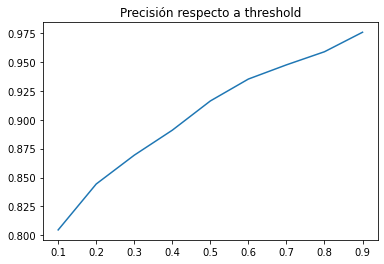

In [126]:
plt.title('Precisión respecto a threshold')
plt.plot(th, p)
plt.show()

In [127]:
import seaborn as sns

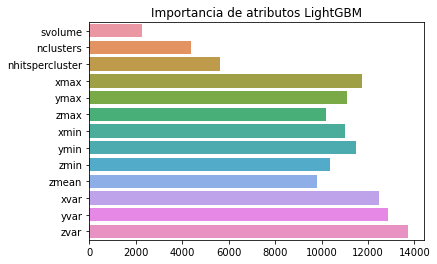

In [128]:
sns.barplot(model.feature_importance(), columns)
plt.title('Importancia de atributos LightGBM')
plt.show()